In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
from math import exp


def genReward(u, s):
    #generate state action value
    return np.random.normal(u, s)

def action_value_estimate(n):
    Q_a = sum(n)/len(n)
    return Q_a

In [2]:
class bandits():
    def __init__(self, arms, init):
        self.arms = arms
        self.rewards = [genReward(3,1) for i in range(arms)]
        self.av_hist = defaultdict(list)
        self.Q_a = [init for i in range(arms)]
        self.a_hist = []
        self.reward_t = []
        self.reward_max = max(self.rewards)
    def epsilon_greedy(self, iterations, epsilon, sm):
        #epsilon greedy algorithm with univariate or boltzmann selection
        for i in range(iterations):
            #Action Selection
            if np.random.choice(range(100)) <= epsilon*100:
                #random or sm
                if sm == 0 or len(self.Q_a) == 0:
                    #sample using univariate
                    a = np.random.choice(range(self.arms))
                else:
                    #sample using boltzmann distribution
                    tau =  .5
                    gibbs_prob = []
                    denom = 0
                    #denominator for boltzmann distribution
                    for x in range(len(self.Q_a)):
                        denom += exp(self.Q_a[x]/tau)
                    #create sampling probability for each action value in Q_a
                    for y in range(len(self.Q_a)):
                        gibbs_prob.append(exp(self.Q_a[y]/tau)/denom)
                    #sample the action number using the constructed gibbs distribution
                    a = np.random.choice(range(self.arms), p = gibbs_prob)
            else:
                #greedy
                a = self.Q_a.index(max(self.Q_a))
            #Take action
            #Store a in a history vector
            self.a_hist.append(a)
            #Reward for action a
            r = self.rewards[a]
            #Append reward to award history vector
            self.reward_t.append(r)
            #Append reward from action 'a' in action value history
            self.av_hist[a].append(r)
            #Use action value history for 'a' to create average action value of 'a' (for stochastic rewards)
            self.Q_a[a] = action_value_estimate(self.av_hist[a])
        #generate average rewards for each 'play' = t
        self.avg_reward_t = [0 for i in range(iterations)]
        for i in range(len(self.reward_t)):
            self.avg_reward_t[i] = sum(self.reward_t[:i])/(i+1)
                
        #plt.plot(range(iterations), self.avg_reward_t)
        #plt.show
        return np.array(self.avg_reward_t)/self.reward_max

Text(0, 0.5, 'Avg % of Optimal at Play')

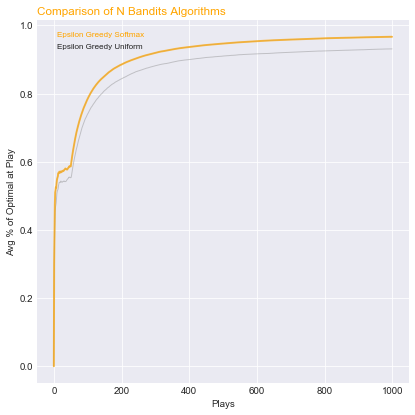

In [3]:
###MAIN###
#parameters
horizon = 1000
epsilon = .1
arms = 50
init = 100
episodes = 20

#Epsilon Greedy with Softmax/Boltzmann
for k in range(episodes): 
    bandito = bandits(arms, init)
    pct_optimal = bandito.epsilon_greedy(horizon, epsilon,1)
    #update average Q
    if k == 0:
        avg_pct_optimal_1 = pct_optimal
    else:
    #increment avg pct of optimal per play
        avg_pct_optimal_1 = avg_pct_optimal_1 + (pct_optimal - avg_pct_optimal_1) / (k+1)
        
#Epsilon Greedy with uniform selection criteria
for k in range(episodes): 
    bandito = bandits(arms, init)
    pct_optimal = bandito.epsilon_greedy(horizon, epsilon, 0)
    #update average Q
    if k == 0:
        avg_pct_optimal_2 = pct_optimal
    else:
    #increment avg pct of optimal per play
        avg_pct_optimal_2= avg_pct_optimal_2 + (pct_optimal - avg_pct_optimal_2) / (k+1)

#df
df = pd.DataFrame({'x': range(horizon), 'y1': avg_pct_optimal_1, 'y2': avg_pct_optimal_2})

#style
plt.style.use('seaborn-darkgrid')
my_dpi=70
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

#plt parameters
for column in df.drop('x', axis=1):
   plt.plot(df['x'], df[column], marker='', color='grey', linewidth=1, alpha=0.4)
   
# Now re do the interesting curve, but biger with distinct color
plt.plot(df['x'], df['y1'], marker='', color='orange', linewidth=2, alpha=0.7)

#Orange line annotation
plt.text(10.2, df.y1.tail(1), 'Epsilon Greedy Softmax', horizontalalignment='left', size='small', color='orange')
plt.text(10.2, df.y2.tail(1), 'Epsilon Greedy Uniform', horizontalalignment='left', size='small')

#plt titles
plt.title('Comparison of N Bandits Algorithms',loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel('Plays')
plt.ylabel('Avg % of Optimal at Play')



Text(0, 0.5, 'Avg % of Optimal at Play')

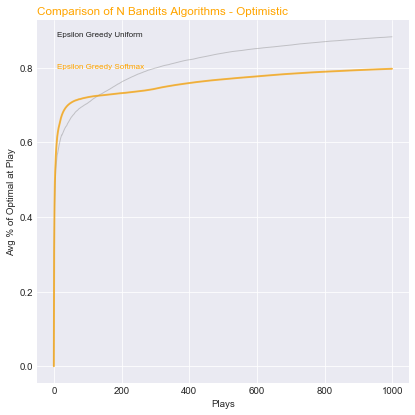

In [4]:
###MAIN###
#parameters
horizon = 1000
epsilon = .1
arms = 50
init = 0
episodes = 20

#Epsilon Greedy with Softmax/Boltzmann
for k in range(episodes): 
    bandito = bandits(arms, init)
    pct_optimal = bandito.epsilon_greedy(horizon, epsilon,1)
    #update average Q
    if k == 0:
        avg_pct_optimal_1 = pct_optimal
    else:
    #increment avg pct of optimal per play
        avg_pct_optimal_1 = avg_pct_optimal_1 + (pct_optimal - avg_pct_optimal_1) / (k+1)
        
#Epsilon Greedy with uniform selection criteria
for k in range(episodes): 
    bandito = bandits(arms, init)
    pct_optimal = bandito.epsilon_greedy(horizon, epsilon, 0)
    #update average Q
    if k == 0:
        avg_pct_optimal_2 = pct_optimal
    else:
    #increment avg pct of optimal per play
        avg_pct_optimal_2= avg_pct_optimal_2 + (pct_optimal - avg_pct_optimal_2) / (k+1)

#df
df = pd.DataFrame({'x': range(horizon), 'y1': avg_pct_optimal_1, 'y2': avg_pct_optimal_2})

#style
plt.style.use('seaborn-darkgrid')
my_dpi=70
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

#plt parameters
for column in df.drop('x', axis=1):
   plt.plot(df['x'], df[column], marker='', color='grey', linewidth=1, alpha=0.4)
   
# Now re do the interesting curve, but biger with distinct color
plt.plot(df['x'], df['y1'], marker='', color='orange', linewidth=2, alpha=0.7)

#Orange line annotation
plt.text(10.2, df.y1.tail(1), 'Epsilon Greedy Softmax', horizontalalignment='left', size='small', color='orange')
plt.text(10.2, df.y2.tail(1), 'Epsilon Greedy Uniform', horizontalalignment='left', size='small')

#plt titles
plt.title('Comparison of N Bandits Algorithms - Optimistic',loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel('Plays')
plt.ylabel('Avg % of Optimal at Play')



Text(0, 0.5, 'Avg % of Optimal at Play')

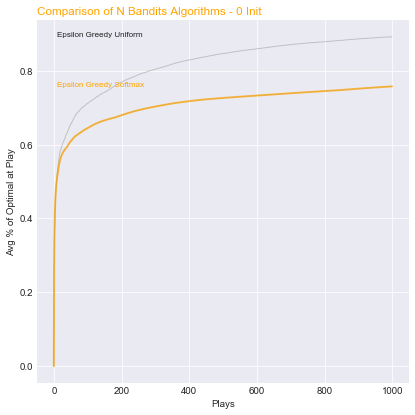

In [6]:
###MAIN###
#parameters
horizon = 1000
epsilon = .1
arms = 50
init = 0
episodes = 20

#Epsilon Greedy with Softmax/Boltzmann
for k in range(episodes): 
    bandito = bandits(arms, init)
    pct_optimal = bandito.epsilon_greedy(horizon, epsilon,1)
    #update average Q
    if k == 0:
        avg_pct_optimal_1 = pct_optimal
    else:
    #increment avg pct of optimal per play
        avg_pct_optimal_1 = avg_pct_optimal_1 + (pct_optimal - avg_pct_optimal_1) / (k+1)
        
#Epsilon Greedy with uniform selection criteria
for k in range(episodes): 
    bandito = bandits(arms, init)
    pct_optimal = bandito.epsilon_greedy(horizon, epsilon, 0)
    #update average Q
    if k == 0:
        avg_pct_optimal_2 = pct_optimal
    else:
    #increment avg pct of optimal per play
        avg_pct_optimal_2= avg_pct_optimal_2 + (pct_optimal - avg_pct_optimal_2) / (k+1)

#df
df = pd.DataFrame({'x': range(horizon), 'y1': avg_pct_optimal_1, 'y2': avg_pct_optimal_2})

#style
plt.style.use('seaborn-darkgrid')
my_dpi=70
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

#plt parameters
for column in df.drop('x', axis=1):
   plt.plot(df['x'], df[column], marker='', color='grey', linewidth=1, alpha=0.4)
   
# Now re do the interesting curve, but biger with distinct color
plt.plot(df['x'], df['y1'], marker='', color='orange', linewidth=2, alpha=0.7)

#Orange line annotation
plt.text(10.2, df.y1.tail(1), 'Epsilon Greedy Softmax', horizontalalignment='left', size='small', color='orange')
plt.text(10.2, df.y2.tail(1), 'Epsilon Greedy Uniform', horizontalalignment='left', size='small')

#plt titles
plt.title('Comparison of N Bandits Algorithms - 0 Init',loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel('Plays')
plt.ylabel('Avg % of Optimal at Play')

